In [1]:
import numpy as np
import matplotlib.pyplot as plt

train_file = open("data/mnist_train.csv", "r")
train_data = train_file.readlines()
train_file.close()

test_file = open("data/mnist_test.csv", "r")
test_data = test_file.readlines()
test_file.close()

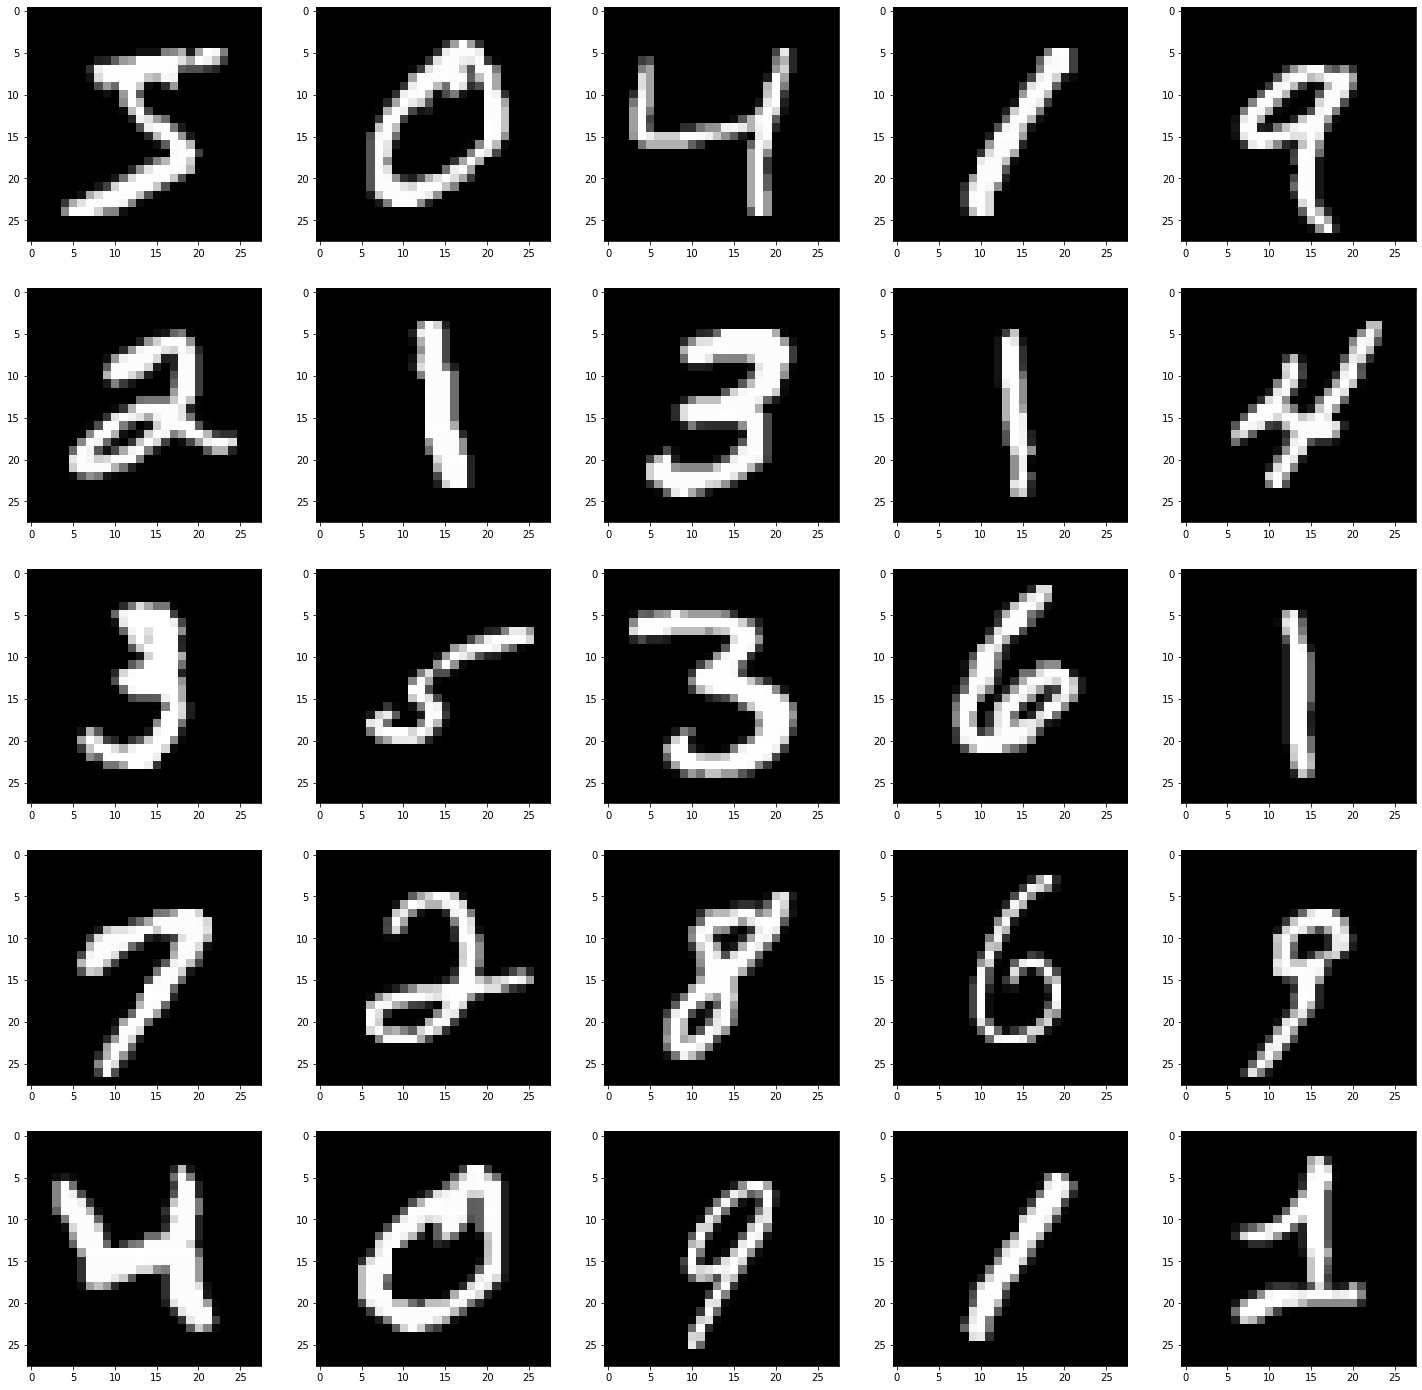

In [16]:
plt.figure(figsize=(25, 25))
for x in range(25):
    plt.subplot(5, 5, x+1)
    x = np.asfarray(train_data[x].split(',')[1:])
    plt.imshow(x.reshape(28, 28), cmap='gray')
    
plt.show()

In [36]:
print("size of train_data: %d, size of test_data: %d" % (len(train_data), len(test_data)))

wih = np.random.randn(784, 100)
wih.shape
target = np.array(np.zeros(10) + 0.01, ndmin=2)
target[0][5] = 0.99
target

size of train_data: 60000, size of test_data: 10000


array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]])

In [25]:
class Network:
    def __init__(self):
        inputs = 784
        hiddens = 100
        outputs = 10
        self.test_data = None

        self.wih = np.random.randn(inputs, hiddens) / (inputs/2)
        self.who = np.random.randn(hiddens, outputs) / (hiddens/2)
        
    def forward(self, x):
        data = self.normalize(np.asfarray(x))
        
        inputs = self.sigmoid(np.dot(data, self.wih))
        output = self.sigmoid(np.dot(inputs, self.who))
        return output
    
    def train(self, train_data, lr=0.01):
        for i, x in enumerate(train_data):
            target = np.array(np.zeros(10) + 0.01, ndmin=2)
            target[0][int(x[0])] = 0.99
            x = self.normalize(np.asfarray(x.split(",")))

            # forward
            l1 = self.sigmoid(np.dot(x[1:], self.wih))
            l2 = self.sigmoid(np.dot(l1, self.who))

            # back propagation
            l2_e = (target - l2) * (l2 * (1 - l2))
            l1_e = l2_e.dot(self.who.T) * (l1 * (1 - l1))

            # update
            self.who = self.who + lr * l2_e.T.dot(np.array(l1, ndmin=2)).T
            self.wih = self.wih + lr * l1_e.T.dot(np.array(x[1:], ndmin=2)).T

            if i % 2000 == 0:
                self.print_accuracy()
    
    def print_accuracy(self):
        matched = 0
        
        for x in self.test_data:
            label = int(x[0])
            predicted = np.argmax(self.forward(x.split(',')[1:]))
            
            if label == predicted:
                matched += 1
                
        print("Accuracy: %s" % (matched/len(self.test_data)))
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def normalize(self, x):
        return (x / 255.0) * 0.99 + 0.01

In [38]:
network = Network()
network.test_data = test_data
network.train(train_data)

Accuracy: 0.0958
Accuracy: 0.0958
Accuracy: 0.2605
Accuracy: 0.1484
Accuracy: 0.1815
Accuracy: 0.2244
Accuracy: 0.2751
Accuracy: 0.2389
Accuracy: 0.2405
Accuracy: 0.3948
Accuracy: 0.4041
Accuracy: 0.5299
Accuracy: 0.5393
Accuracy: 0.5832
Accuracy: 0.6193
Accuracy: 0.6526
Accuracy: 0.6945
Accuracy: 0.6808
Accuracy: 0.715
Accuracy: 0.7405
Accuracy: 0.7924
Accuracy: 0.7828
Accuracy: 0.8085
Accuracy: 0.813
Accuracy: 0.837
Accuracy: 0.8484
Accuracy: 0.8459
Accuracy: 0.8362
Accuracy: 0.8526
Accuracy: 0.8476


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


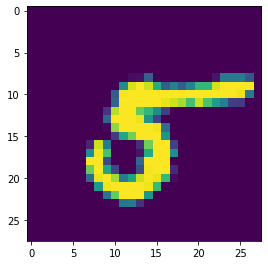

In [48]:
matched = 0
plt.figure(figsize=(25, 25))

for (i, x) in enumerate(test_data):
    _max = 0
    label = int(x[0])
    predicted = np.argmax(network.forward(x.split(',')[1:]))

    if label != predicted and _max != 25:
        plt.subplot(5, 5, _max+1)
        _x = np.asfarray(x.split(',')[1:]).reshape(28, 28)
        plt.imshow(_x)
        
        _max += 1

plt.show()